# VCS Text Objects

[Table Of Content](#toc)<a href="TOC"></a>

  * [Introduction](#intro)
  * [Positioning Text](#postiion)
  * [Text Table Section](#Tt)
    * [Fonts](#fonts)
      * [Changing the fonts](#changing)
      * [Adding Fonts](#adding)
    * [Color](#color)
    * [Projection](#projection)
    * [Ordering Object On The Plot](#priority)
    * [Deprecated Attributes](#deprecated)
  * [Text Orientation Section](#To)
    * [Size](#size)
    * [Angle](#angle)
    * [Alignement](#align)
      * [Horizontal](#horiz)
      * [Vertical](#vert)
  * [Mathematical Expressions and Symbols](#math)
  * [Example: Bringing it all together](#example)
  
## Introduction<a id="intro"></a>


VCS let you plot text objects on a plot.

In [1]:
# Styling for notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
import vcs
canvas=vcs.init(geometry=(800,600),bg=True)
txt = vcs.createtext()
txt.list()

---------- Text combined (Tc) member (attribute) listings ----------
secondary method = Tc
 ---------- Text Table (Tt) member (attribute) listings ----------
Tt_name = __texttable_120949571768503
font = 1
spacing = 2
expansion = 100
color = [0.0, 0.0, 0.0, 100.0]
fillincolor = 0
priority = 1
string = ['']
viewport = [0.0, 1.0, 0.0, 1.0]
worldcoordinate = [0.0, 1.0, 0.0, 1.0]
x = None
y = None
projection = default
 ---------- Text Orientation (To) member (attribute) listings ----------
To_name = __textorientation_288802062631269
height = 14
angle = 0
path = right
halign = left
valign = half


As you can see VCS text pbjects are composed of two part the [texttable](#Tt) and the [textorientation](#To)

Text Table controls the font, color, actual text (string), and location options
Text Orientation control the text font, size and alignements

## Controling Placements of Text Objects<a id="position"></a>

Please refer to the [VCS Principles](VCS_Principles.ipynb#secondary) for details on `viewport` and `worldcoordinates`.

Essentially the viewport describe the area on the canvas where to draw, and the world coordinates are used within this area. Both are initialized at `[0,1,0,1]`

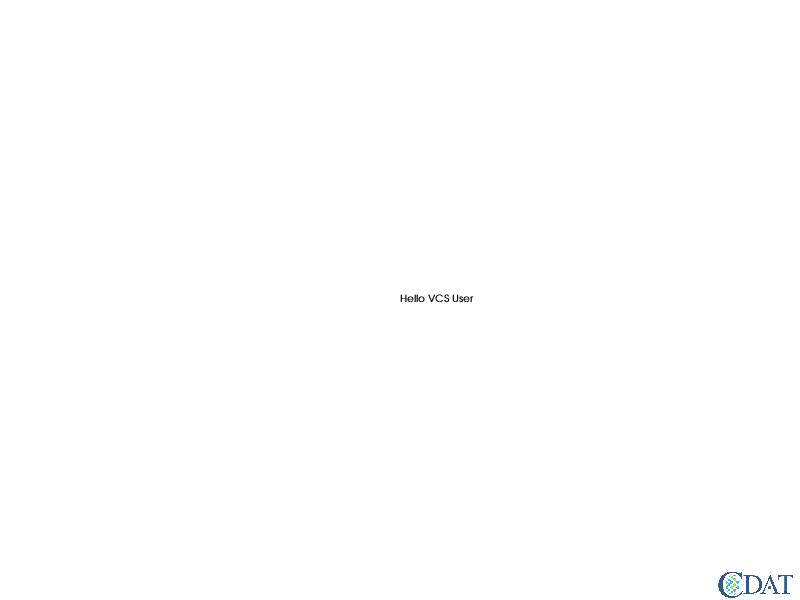

In [2]:
txt.string = 'Hello VCS User'  # Or list of strings
txt.x = .5  # Or list of coordinates
txt.y = .5
canvas.plot(txt)

## Text Table<a id="Tt"></a>

### Fonts<a id="fonts"></a>

#### Changing the font<a id="changing"></a>

You can control the fonts via the `font` attribute

Available fonts a are available via the `vcs.getlistelements("font")` option

Default fonts are:

`Adelon', 'Arabic', 'AvantGarde', 'Chinese', 'Clarendon', 'Courier', 'DejaVuSans', 'DejaVuSans-Bold', 'DejaVuSans-BoldOblique', 'DejaVuSans-ExtraLight', 'DejaVuSans-Oblique', 'DejaVuSansCondensed', 'DejaVuSansCondensed-Bold', 'DejaVuSansCondensed-BoldOblique', 'DejaVuSansCondensed-Oblique', 'Greek', 'Hebrew', 'Helvetica', 'Maths1', 'Maths2', 'Maths3', 'Maths4', 'Russian', 'Times'

Example:


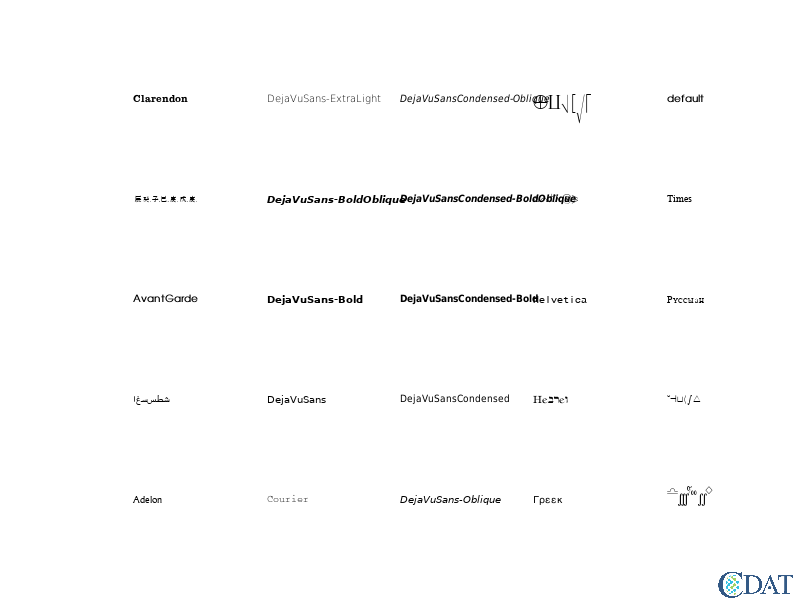

In [3]:
fonts = vcs.listelements("font")
N = len(fonts)
grid = 5. # 5x5 grid
delta = 1./6.
canvas.clear()
for i, font in enumerate(fonts):
    txt.font = font
    txt.string = font
    yindx = i % grid
    xindx = int(i/grid)
    txt.x = delta + xindx*delta
    txt.y = delta + yindx*delta
    dsp = canvas.plot(txt)
# Resets
txt.x = [.5]
txt.y = [.5]
txt.string = "A VCS Text Object"
dsp

#### Adding fonts<a id="adding"></a>

You can add TrueType fonts to vcs by using the `canvas.addfont` function

```
vcs.addfont("Path_to_my_font.ttf", name="Myfont")
txt.font = "Myfont"
```

**Currently broken** see [this issue](https://github.com/CDAT/vcs/issues/343)

### Color<a id="color"></a>

You can control the font `color` via the color attribute, you can send a string representing the color name, an index in the text object colormap.

You can change the colormap via the `colormap` attribute

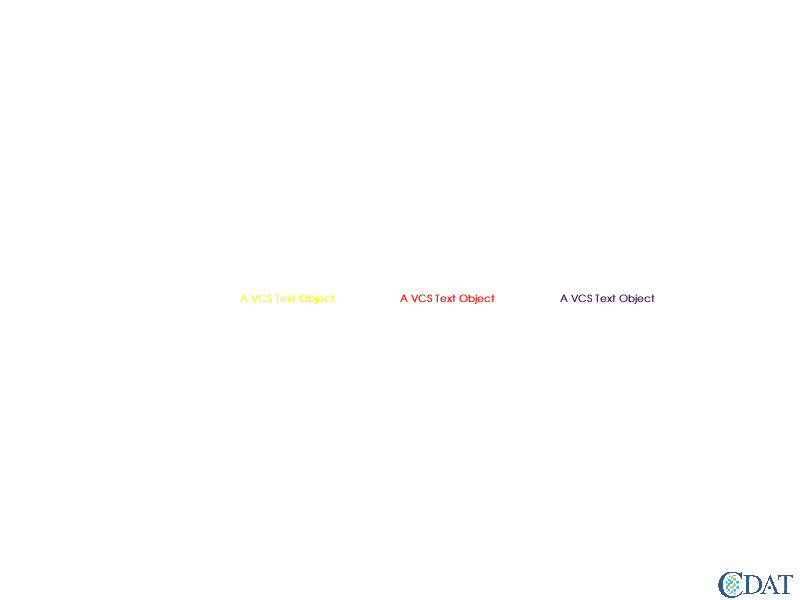

In [4]:
canvas.clear()
txt.color = "Red"
canvas.plot(txt)
txt.x[0] += .2
txt.color = 5
canvas.plot(txt)
txt.colormap = "AMIP"  # Changing the colormap chjange the color of index 5
txt.x[0] -= .4
canvas.plot(txt)

### Projection<a id="projection"></a>

IF your worldcoordinates are representing lat/lon, you can use the `projection` attribute to apply a projection (and its settngs) to your text location.

***Currently broken*** see [This issue](https://github.com/CDAT/vcs/issues/344)

In [5]:
canvas.clear()
txt.worldcoordinate = [-20,60,20,80]
txt.x = 0.
txt.y = 85.
txt.color= "black"
txt.string = "High Lat"
canvas.plot(txt)
txt.projection="lambert"  # polar projection
# canvas.plot(txt)

### Ordering in the plot<a id="priority"></a>

you can control the `layer` on which the object will be drawn via the `priority` attribute. Higher `priority` object are drawn on top of lower `priority` ones.

In [6]:
txt.priority = 0  # Turn off
txt.priority = 2  # move to a layer on top of "default" layer (1)

### Deprecated attributes<a id="deprecated"></a>

The following attribute are left over from XGKS and are not use anymore:

`spacing`, `fillingcolor`, `expansion`

## Text Orientation<a id="To"></a>

### Size<a id="size"></a>

You can control the size (or **height**) of text objects as follow:
    

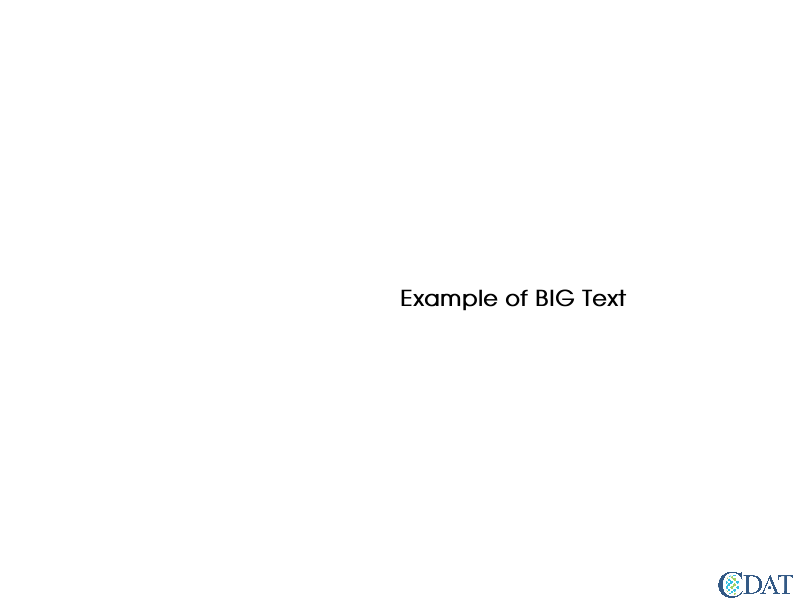

In [7]:
canvas.clear()
txt = vcs.createtext()
txt.string = "Example of BIG Text"
txt.x = .5
txt.y = .5
txt.height = 30
canvas.plot(txt)

### Angle<a id="angle"></a>

You can control the **clockwise** rotation of a text object as shown bellow:

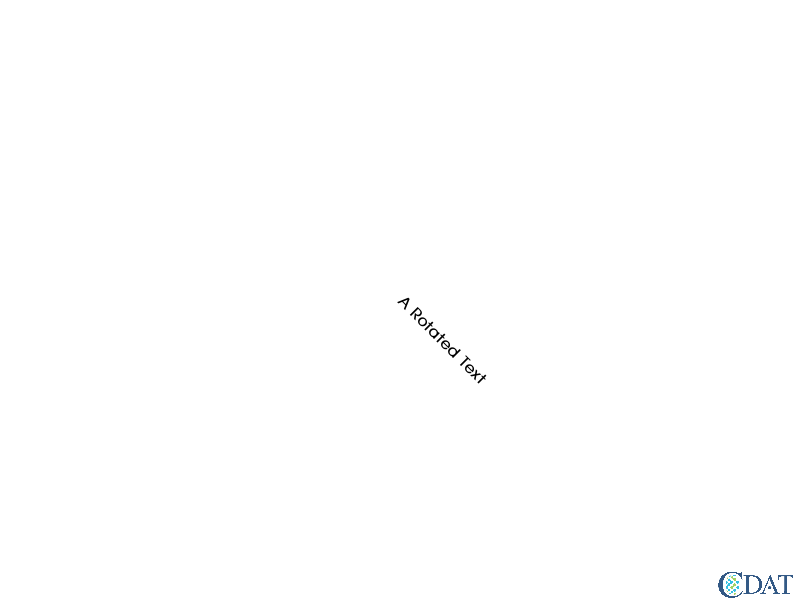

In [8]:
canvas.clear()
txt.angle = 45 
txt.height =20.
txt.string = "A Rotated Text"
canvas.plot(txt)

### Alignement<a id="align"></a>

You can control how to align the text relatively to to its coordinates

#### Horizontal Alignement<a id="horiz"></a>

You can control the horizontal alignement via the **halign** attribute, possible values are: *('left', 'center', 'right') or (0, 1, 2)*

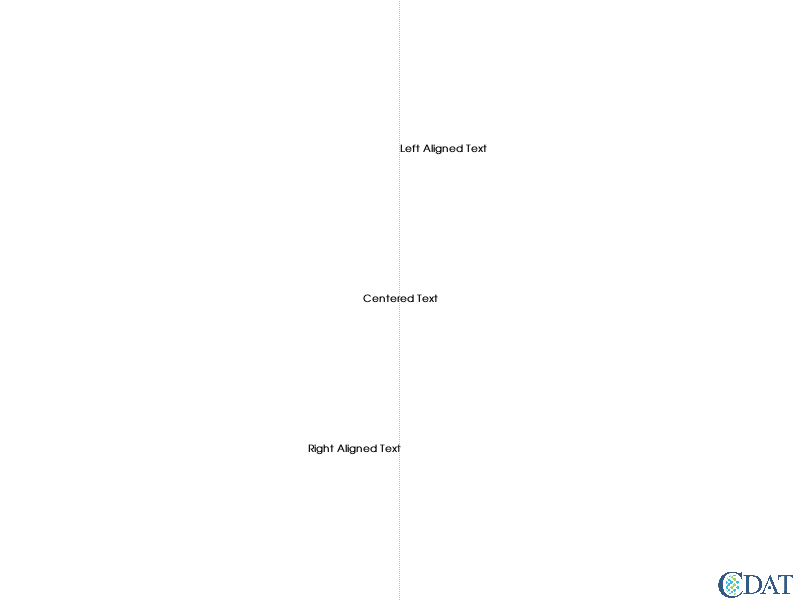

In [9]:
canvas.clear()
line = vcs.createline()
line.x = [.5,.5]
line.y = [0.,1.]
line.type ="dot"
line.color=["grey"]
center = vcs.createtext()
center.x = .5
center.y = .5
center.string = "Centered Text"
center.halign = "center"
right = vcs.createtext()
right.x = .5
right.y = .25
right.string = "Right Aligned Text"
right.halign = "right"
left = vcs.createtext()
left.x = .5
left.y = .75
left.string = "Left Aligned Text"
left.halign = "left"
canvas.plot(center)
canvas.plot(right)
canvas.plot(left)
canvas.plot(line)

#### Vertical Alignement<a id="vert"></a>

You can control the vertical alignement via the **valign** attribute, possible values are: *('top', 'cap', 'half', 'base', 'bottom') or (0, 1, 2, 3, 4)*

Note that **cap** is the same as **top** at the moment

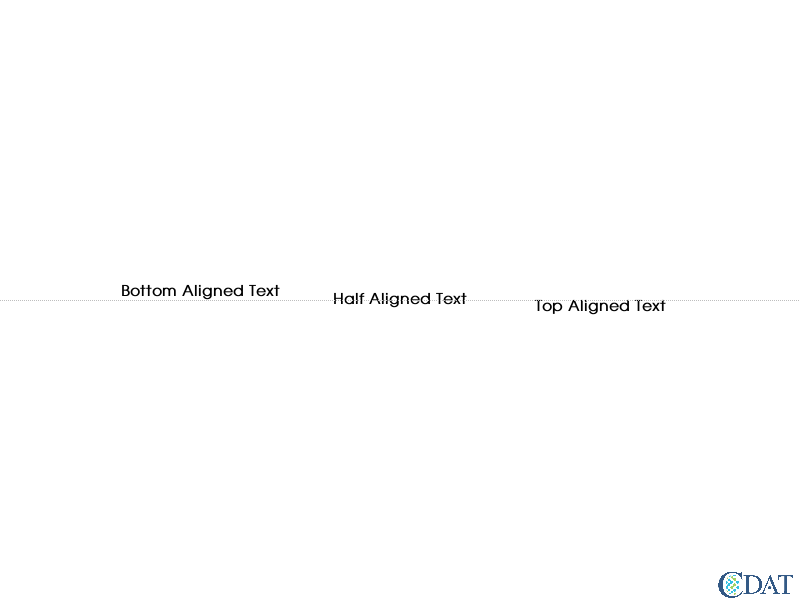

In [10]:
canvas.clear()
line = vcs.createline()
line.y = [.5,.5]
line.x = [0.,1.]
line.type ="dot"
line.color=["grey"]
half = vcs.createtext()
half.height = 20
half.halign = "center"
half.x = .5
half.y = .5
half.string = "Half Aligned Text"
half.valign = "Half"
bottom = vcs.createtext()
bottom.halign='center'
bottom.height=20
bottom.x = .25
bottom.y = .5
bottom.string = "Bottom Aligned Text"
bottom.valign = "bottom"
top = vcs.createtext()
top.halign='center'
top.height=20
top.x = .75
top.y = .5
top.string = "Top Aligned Text"
top.valign = "top"
cap = vcs.createtext()
cap.x = .75
cap.y = .75
cap.string = "Cap Aligned Text"
cap.valign = "cap"
canvas.plot(half)
canvas.plot(bottom)
canvas.plot(top)
canvas.plot(line)

## Mathematical Expressions and Symbols<a id="math"></a>

See [dedicated notebook](https://cdat.llnl.gov/Jupyter/Mathematical_Expressions_and_Symbols/Mathematical_Expressions_and_Symbols.html)


## Example: Bringing it all together<a id="example"></a>

We are plotting a world coordinate locate rotated and colored text object on top of a map.


/home/doutriaux1/anaconda2/envs/cdat8/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


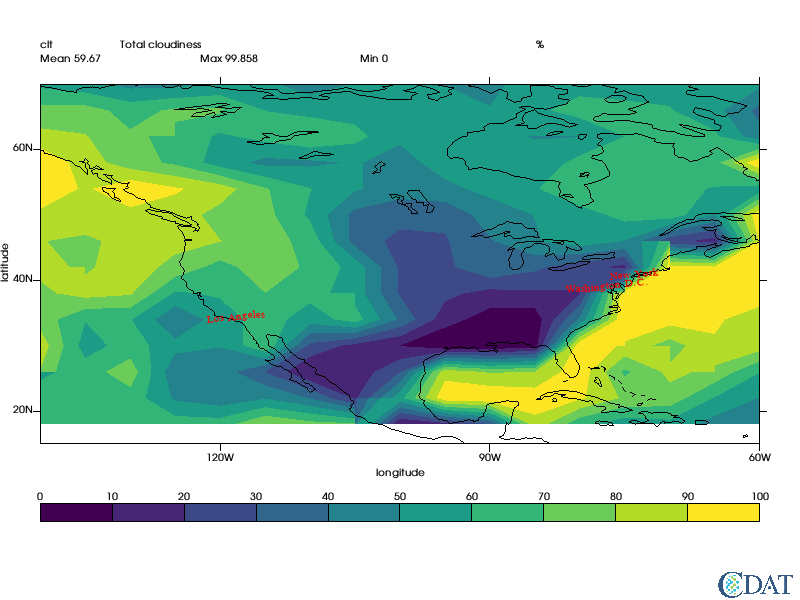

In [11]:
canvas.clear()
import cdms2, os
f=cdms2.open(os.path.join(vcs.sample_data,"clt.nc"))

# Continental U.S.A. region
lat1 = 15.
lat2 = 70.
lon1 = -140.
lon2 = -60.

# Read data in
clt = f("clt",time=slice(0,1),latitude=(lat1,lat2),longitude=(lon1,lon2),squeeze=1)

# Isofill method
gm = vcs.createisofill()
gm.datawc_x1 = lon1
gm.datawc_x2 = lon2
gm.datawc_y1 = lat1
gm.datawc_y2 = lat2

# Template (not modified)
templ = vcs.createtemplate()

# Text object
txt = vcs.createtext()
txt.string = ["Washington D.C.", "New York", "Los Angeles"]
txt.halign = "center"
txt.valign = "half"
txt.color = "red"
txt.font = "Times"
txt.height = 15
txt.priority = 2
txt.angle = -5
txt.y = [38.9072, 40.7128, 34.0522]
txt.x = [-77.0369, -74.0060, -118.2437]
txt.worldcoordinate = [lon1, lon2, lat1, lat2]
txt.viewport = [templ.data.x1, templ.data.x2, templ.data.y1, templ.data.y2]

# Plot text first to show priority
canvas.plot(txt)

# Now data plotted "bellow" text
canvas.plot(clt,gm)